In [1]:
! pip install tensorflow

   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.9 MB 1.4 MB/s eta 0:04:04
   ---------------------------------------- 0.1/331.9 MB 991.0 kB/s eta 0:05:35
   ---------------------------------------- 0.1/331.9 MB 1.1 MB/s eta 0:05:12
   ---------------------------------------- 0.2/331.9 MB 1.2 MB/s eta 0:04:41
   ---------------------------------------- 0.2/331.9 MB 1.1 MB/s eta 0:04:59
   ---------------------------------------- 0.3/331.9 MB 1.1 MB/s eta 0:04:56
   ---------------------------------------- 0.3/331.9 MB 1.1 MB/s eta 0:05:00
   ---------------------------------------- 0.4/331.9 MB 1.1 MB/s eta 0:04:53
   ---------------------------------------- 0.5/331.9 MB 1.1 MB/s eta 0:04:53
   ---------------------------------------- 0.5/331.9 MB 1.2 MB/s eta 0:04:44
   ---------------------------------------- 0.6/331.9 MB 1.1 MB/s eta 0:04:49
   ---------------------------------------- 0.6/331.9 MB 1.2 MB/s eta


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import tensorflow as tf

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
  Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
  MaxPooling2D((2,2)),
  Conv2D(64, (3,3), activation='relu'),
  MaxPooling2D((2,2)),
  Flatten(),
  Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8252 - loss: 0.4852 - val_accuracy: 0.8608 - val_loss: 0.3878
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8808 - loss: 0.3328 - val_accuracy: 0.8777 - val_loss: 0.3445
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8961 - loss: 0.2913 - val_accuracy: 0.8805 - val_loss: 0.3179
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9051 - loss: 0.2618 - val_accuracy: 0.8993 - val_loss: 0.2849
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9122 - loss: 0.2419 - val_accuracy: 0.8925 - val_loss: 0.2993


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("✅ Test Accuracy:", test_acc)


313/313 - 1s - 3ms/step - accuracy: 0.8925 - loss: 0.2993
✅ Test Accuracy: 0.8924999833106995


In [12]:
import matplotlib.pyplot as plt

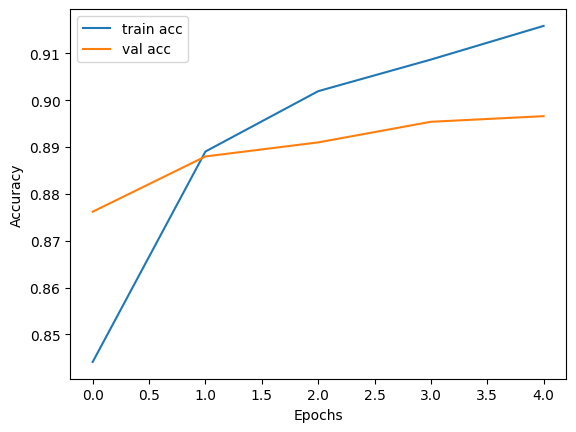

In [8]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
